### 정규표현식 연습

In [14]:
import re
r=re.compile("ab?c")
r.search("abbc") # 아무런 결과도 출력되지 않는다.

In [2]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [5]:
import re
r=re.compile("ab+c")
r.search("kabc") # 아무런 결과도 출력되지 않는다.

<re.Match object; span=(1, 4), match='abc'>

In [8]:
r.search("kabc")

<re.Match object; span=(1, 4), match='abc'>

In [9]:
import re
text="사과 딸기 수박 메론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '메론', '바나나']

In [11]:
import re
text=
"""
이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남
"""  
re.findall("\d+",text)

['010', '1234', '1234', '30']

In [12]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


## 정수 인코딩

컴퓨터는 텍스트보다는 숫자를 더 잘 처리 할 수 있습니다. 이를 위해 자연어 처리에서는 텍스트를 숫자로 바꾸는 여러가지 기법들이 있다.
##### 각 단어를 고유한 정수에 맵핑(mapping)시키는 전처리 작업
보통은 전처리 또는 빈도수가 높은 단어들만 사용하기 위해서 단어에 대한 빈도수를 기준으로 정렬한 뒤에 부여한다.

### 1. 정수 인코딩

단어에 정수를 부여하는 방법 중 하나로 단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여하는 방법이 있습니다. 이해를 돕기위해 단어의 빈도수가 적당하게 분포되도록 의도적으로 만든 텍스트 데이터를 가지고 실습해보겠습니다.

#### 1) dictionary 사용하기


In [15]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

text = sent_tokenize(text)

vocab = {} # 파이썬의 dictionary 자료형
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [17]:
print(vocab)
# 단어를 키로 단어에 대한 빈도수가 값으로 저장되어져 있다.

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [22]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)

word_to_index = {}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word] = i
vocab_size = 5
words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


### 2) Counter 사용하기

In [23]:
from collections import Counter

print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [25]:
words = sum(sentences, []) #문장의 경계인 [,] 를 제거하고 단어들을 하나의 리스트로 만들자
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [27]:
vocab = Counter(words) # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있습니다.
vocab

Counter({'barber': 8,
         'person': 3,
         'good': 1,
         'huge': 5,
         'knew': 1,
         'secret': 6,
         'kept': 4,
         'word': 2,
         'keeping': 2,
         'driving': 1,
         'crazy': 1,
         'went': 1,
         'mountain': 1})

In [28]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [30]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


## 2. 케라스의 텍스트 전처리

케라스의 전처리 도구인 토크나이저를 사용하기도 하는데, 사용 방법과 그 특징에 대해서 이해해보자

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences=[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


# 패딩

자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다. 다시 말해 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있습니다. 실습을 통해 이해해봅시다.


In [34]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.

encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [35]:
max_len = max(len(item) for item in encoded)
print(max_len)

7


In [37]:
# 가장 긴 문장의 길이는 7 이기 때문에 7로 맞춘다.
# 이와 같이 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 합니다. 숫자 0을 사용하고 있다면 제로 패딩(zero padding)이라고 합니다.
for item in encoded: # 각 문장에 대해서
    while len(item) < max_len:   # max_len보다 작으면
        item.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

## 원-핫 인코딩(One-Hot Encoding)

컴퓨터 또는 기계는 문자보다는 숫자를 더 잘 처리 할 수 있습니다. 이를 위해 자연어 처리에서는 문자를 숫자로 바꾸는 여러가지 기법들이 있습니다. 원-핫 인코딩(One-Hot Encoding)은 그 많은 기법 중에서 단어를 표현하는 가장 기본적인 표현 방법이며, 머신 러닝, 딥 러닝을 하기 위해서는 반드시 배워야 하는 표현 방법입니다.

ex) book은 150번, dog는 171번, love는 192번, books는 212번과 같이 부여할 수 있다.

## 원-핫 인코딩이란?
원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 

(1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)

(2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

In [38]:
from konlpy.tag import Okt  
okt=Okt()  
token=okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [39]:
word2index={}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca]=len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [40]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index=word2index[word]
       one_hot_vector[index]=1
       return one_hot_vector

In [41]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

## 데이터의 분리

머신 러닝(딥 러닝) 모델에 데이터를 훈련시키기 위해서는 데이터를 적절히 분리하는 작업이 필요합니다.

지도학습을 위한 데이터 분리 작업을 알아보자

### 지도 학습
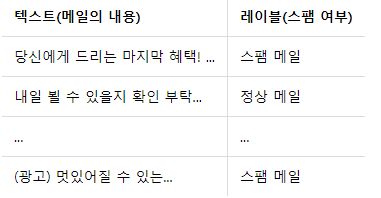

위와 같이 데이터가 20000개 있다고 가정했을 때 18000개의 데이터를 훈련용 데이터, 2000개의 데이터를 테스트 데이터로 분리해서 생각하자

##### <훈련 데이터>
X_train : 문제지 데이터

y_train : 문제지에 대한 정답 데이터.

##### <테스트 데이터>
X_test : 시험지 데이터.

y_test : 시험지에 대한 정답 데이터.

In [42]:
# zip 함수를 이용하여 분리하기
X,y = zip(['a', 1], ['b', 2], ['c', 3])
print(X)
print(y)


('a', 'b', 'c')
(1, 2, 3)


In [43]:
# 데이터프레임을 이용하여 분리하기 

import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [47]:
# Numpy를 이용하여 분리하기

import numpy as np
ar = np.arange(0,16).reshape((4,4))
print(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


### 테스트 데이터 분리하기

#### 사이킷 런을 이용하여 분리하기

사이킷 런은 학습용 테스트와 테스트용 데이터를 분리하게 해주는 train_test_split를 지원합니다.

In [50]:
from sklearn.model_selection import train_test_split
# test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
# train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
# random_state : 난수 시드
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
print(X)
print(list(y)) #레이블 데이터

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
#3분의 1만 test 데이터로 지정.
#random_state 지정으로 인해 순서가 섞인 채로 훈련 데이터와 테스트 데이터가 나눠진다.

In [52]:
print(X_train)
print(X_test)

[[2 3]
 [4 5]
 [6 7]]
[[8 9]
 [0 1]]


In [53]:
print(y_train)
print(y_test)

[1, 2, 3]
[4, 0]
